### Import the required libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
# the matplotlib plots will appear directly below the cell in which the plot function was called

from encodings.aliases import aliases


### Reading the csv file

In [2]:
# to find the correct encoding that can be used, as in this case the default encoding uft-08 won't work
alias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try:
        df = pd.read_csv(r'C:\Users\VAIBHAV\OneDrive\Desktop\python for data analysis\Criminal_Data_Analysis\Crime.csv', nrows=10,encoding=encoding)
        print('success',encoding)
    except:
        pass

success iso8859_13
success iso8859_4
success koi8_r
success cp858
success mac_iceland
success iso8859_7
success cp1257
success cp1253
success cp869
success cp1252
success cp857
success latin_1
success iso8859_2
success hp_roman8
success cp1258
success cp863
success iso8859_14
success cp500
success cp932
success cp862
success gbk
success iso8859_11
success cp437
success cp1250
success mac_roman
success cp949
success gb18030
success cp273
success cp861
success iso8859_15
success mac_latin2
success cp852
success iso8859_8
success cp1125
success cp1255
success utf_16_le
success ptcp154
success iso8859_10
success cp866
success cp1256
success iso8859_16
success mbcs
success mac_turkish
success cp860
success mac_greek
success cp775
success mac_cyrillic
success iso8859_5
success cp1254
success cp850
success cp1140
success cp1251
success cp864
success cp037
success cp865
success iso8859_6
success utf_16_be
success iso8859_3
success cp855
success kz1048
success iso8859_9
success big5hkscs
succes

In [3]:
# reading the file with one of the above encoding

crime = pd.read_csv(r'C:\Users\VAIBHAV\OneDrive\Desktop\python for data analysis\Criminal_Data_Analysis\Crime.csv', encoding='ISO-8859-11')

In [4]:
crime.head()
#see the first 5 rows of the table

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [5]:
crime.shape
# see the no. of rows and cols

(319073, 17)

### finding the duplicate rows and deleting them

In [6]:
crime.duplicated().sum()
#to find the duplicated rows

23

In [7]:
crime.drop_duplicates(inplace=True)
#deleting duplicate rows

In [8]:
crime.shape

(319050, 17)

### Exploring the datasets

In [9]:
crime.info()
#summary info of the dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long                 2

In [10]:
# Changing the data type from object to datetime for the OCCURRED_ON_DATE column
crime.OCCURRED_ON_DATE = pd.to_datetime(crime.OCCURRED_ON_DATE)

In [11]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319050 non-null  object        
 1   OFFENSE_CODE         319050 non-null  int64         
 2   OFFENSE_CODE_GROUP   319050 non-null  object        
 3   OFFENSE_DESCRIPTION  319050 non-null  object        
 4   DISTRICT             317285 non-null  object        
 5   REPORTING_AREA       319050 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319050 non-null  datetime64[ns]
 8   YEAR                 319050 non-null  int64         
 9   MONTH                319050 non-null  int64         
 10  DAY_OF_WEEK          319050 non-null  object        
 11  HOUR                 319050 non-null  int64         
 12  UCR_PART             318960 non-null  object        
 13  STREET             

In [12]:
# easily extract datetime information from the OCCURRED_ON_DATE column
crime.OCCURRED_ON_DATE.dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
319068    2016
319069    2015
319070    2015
319071    2016
319072    2015
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [13]:
crime.OCCURRED_ON_DATE.dt.month

0         9
1         8
2         9
3         9
4         9
         ..
319068    6
319069    7
319070    7
319071    5
319072    6
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [14]:
crime.OCCURRED_ON_DATE.dt.hour

0         13
1          0
2         19
3         21
4         21
          ..
319068    17
319069    13
319070    13
319071    19
319072     0
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [15]:
crime.describe()
#summary info on numeric cols

,OFFENSE_CODE,OCCURRED_ON_DATE,YEAR,MONTH,HOUR,Lat,Long
count,319050.000000,319050,319050.000000,319050.000000,319050.000000,299052.000000,299052.000000
mean,2317.516957,2017-01-25 12:35:59.149211904,2016.560674,6.609622,13.118176,42.214373,-70.908260
min,111.000000,2015-06-15 00:00:00,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016-04-12 03:30:00,2016.000000,4.000000,9.000000,42.297438,-71.097135
50%,2907.000000,2017-01-28 04:36:00,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017-11-05 18:39:00,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018-09-03 21:25:00,2018.000000,12.000000,23.000000,42.395042,-1.000000
std,1185.308921,NaN,0.996312,3.273677,6.294258,2.159845,3.493746


In [16]:
crime.describe(include='object')
#summary info on the non-numeric cols

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


In [17]:
crime.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [18]:
crime.columns[crime.isnull().sum() != 0]
#checking for cols with missing values
# another method would be using numpy
# crime.columns[np.sum(crime.isnull())!=0]

Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

In [19]:
crime.columns[crime.isnull().sum() == 0]

#checking for cols with no missing values

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR',
       'MONTH', 'DAY_OF_WEEK', 'HOUR', 'Location'],
      dtype='object')

In [20]:
# checking for unique values in every col

for col in crime.columns:
    unique_cnt = crime[col].nunique()
    print(col + " has " + str(unique_cnt) + ' unique values')

INCIDENT_NUMBER has 282517 unique values
OFFENSE_CODE has 222 unique values
OFFENSE_CODE_GROUP has 67 unique values
OFFENSE_DESCRIPTION has 244 unique values
DISTRICT has 12 unique values
REPORTING_AREA has 879 unique values
SHOOTING has 1 unique values
OCCURRED_ON_DATE has 233229 unique values
YEAR has 4 unique values
MONTH has 12 unique values
DAY_OF_WEEK has 7 unique values
HOUR has 24 unique values
UCR_PART has 4 unique values
STREET has 4657 unique values
Lat has 18178 unique values
Long has 18178 unique values
Location has 18194 unique values


## Answering some questions related to this data

### What are the most common crimes in terms of offense group?

In [21]:
crime.OFFENSE_CODE_GROUP.value_counts()

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18749
Other                                        18073
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: count, Length: 67, dtype: int64

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18749
Other                              18073
Drug Violation                     16545
Simple Assault                     15826
Vandalism                          15414
Verbal Disputes                    13099
Towed                              11287
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

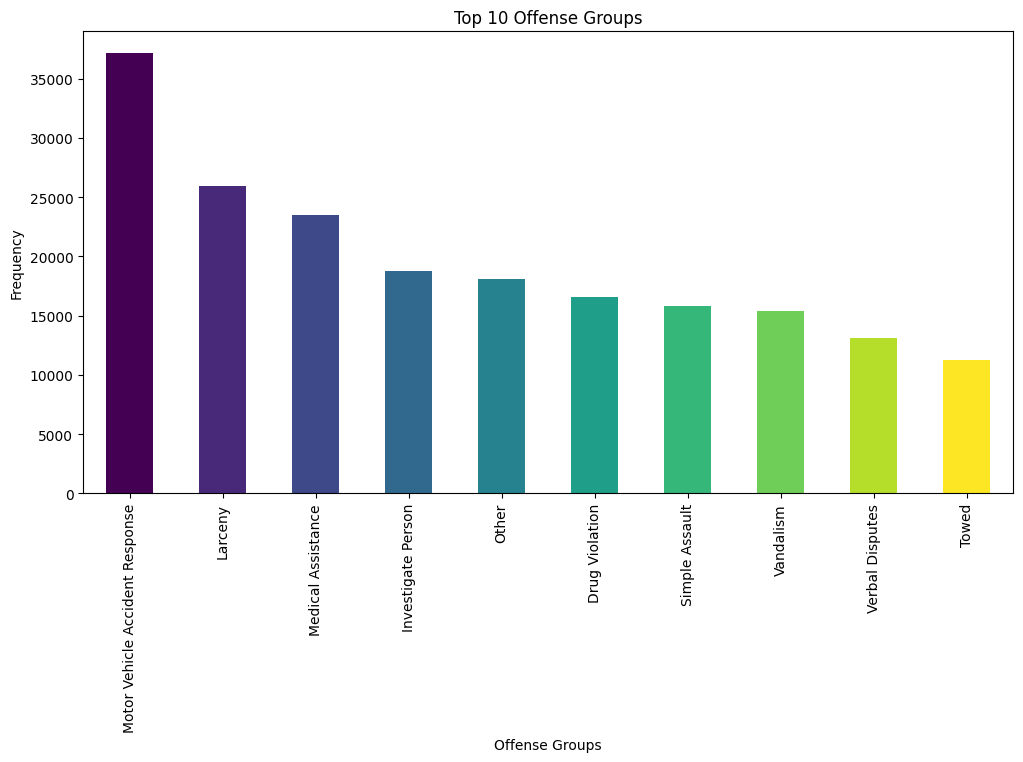

In [22]:
dt = crime.OFFENSE_CODE_GROUP.value_counts()[:10]

display(dt)
plt.figure(figsize=(12, 6))

# generates a different number corresponding to a unique color from the color group to use
colors = plt.cm.viridis(np.linspace(0, 1, len(dt)))

dt.plot(kind='bar',color=colors);
plt.title('Top 10 Offense Groups')
plt.xlabel('Offense Groups')
plt.ylabel('Frequency')

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    0.116383
Larceny                            0.081288
Medical Assistance                 0.073782
Investigate Person                 0.058765
Other                              0.056646
Drug Violation                     0.051857
Simple Assault                     0.049604
Vandalism                          0.048312
Verbal Disputes                    0.041056
Towed                              0.035377
Name: count, dtype: float64

Text(0.5, 0, 'Offense Groups')

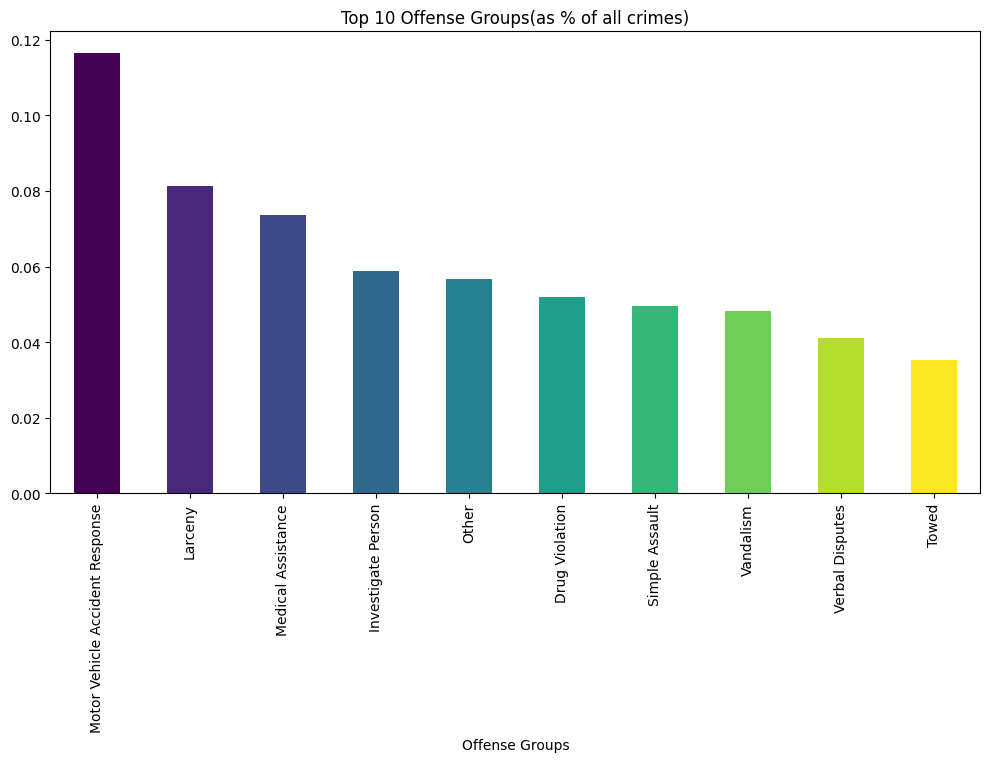

In [23]:
dt = crime.OFFENSE_CODE_GROUP.value_counts()[:10]

display(dt/crime.shape[0])
plt.figure(figsize=(12, 6))

# generates a different number corresponding to a unique color from the color group to use
colors = plt.cm.viridis(np.linspace(0, 1, len(dt)))

(dt/crime.shape[0]).plot(kind='bar',color=colors);
plt.title('Top 10 Offense Groups(as % of all crimes)')
plt.xlabel('Offense Groups')
#plt.ylabel('Frequency')

### What are the least common crimes in terms of offense group?

In [24]:
crime.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=True)[:10]

OFFENSE_CODE_GROUP
Burglary - No Property Taken                  2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
Biological Threat                             2
INVESTIGATE PERSON                            4
HUMAN TRAFFICKING                             7
Gambling                                      8
Manslaughter                                  8
Explosives                                   27
Phone Call Complaints                        31
Aircraft                                     36
Name: count, dtype: int64

'Least Common Offense Groups'

OFFENSE_CODE_GROUP
Burglary - No Property Taken                  2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
Biological Threat                             2
INVESTIGATE PERSON                            4
HUMAN TRAFFICKING                             7
Gambling                                      8
Manslaughter                                  8
Explosives                                   27
Phone Call Complaints                        31
Aircraft                                     36
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

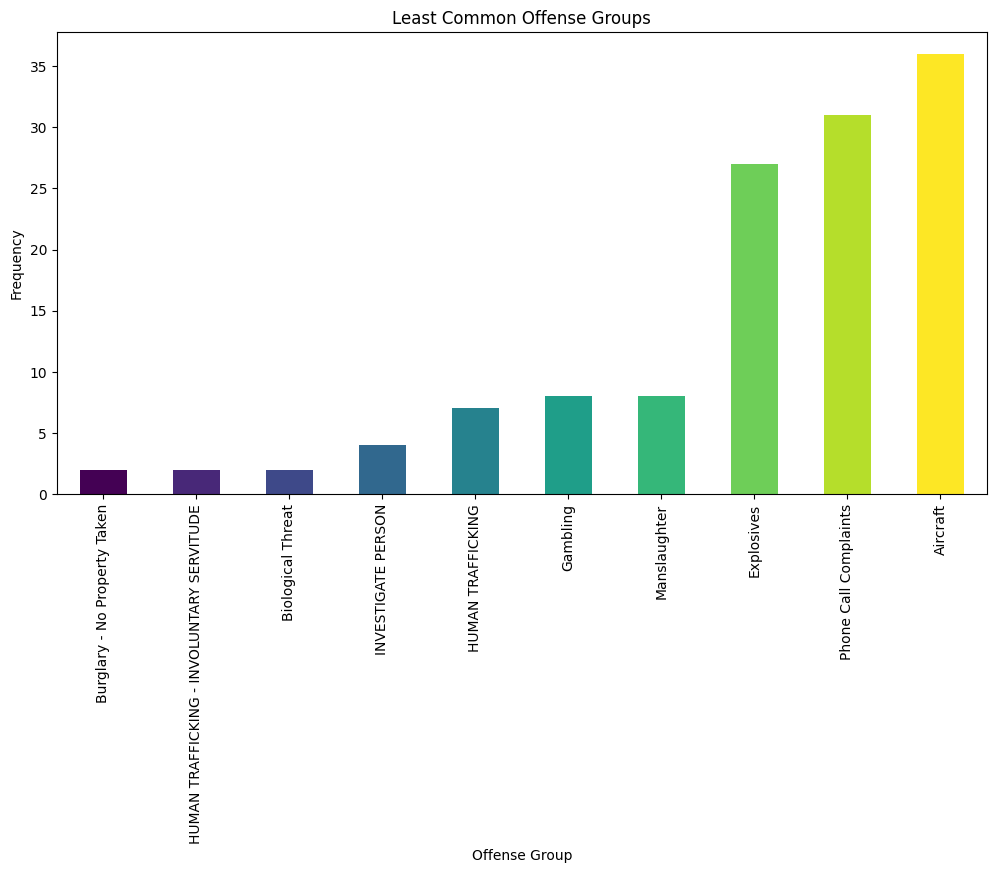

In [25]:
dt = crime.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=True)[:10]

display('Least Common Offense Groups')
display(dt)
plt.figure(figsize=(12,6))

# generates a different number corresponding to a unique color from the color group to use
colors = plt.cm.viridis(np.linspace(0, 1, len(dt)))

dt.plot(kind='bar', color=colors)
plt.title('Least Common Offense Groups')
plt.xlabel('Offense Group')
plt.ylabel('Frequency')




'Least Common Offense Groups(as % of all crimes)'

OFFENSE_CODE_GROUP
Burglary - No Property Taken                 0.000006
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE    0.000006
Biological Threat                            0.000006
INVESTIGATE PERSON                           0.000013
HUMAN TRAFFICKING                            0.000022
Gambling                                     0.000025
Manslaughter                                 0.000025
Explosives                                   0.000085
Phone Call Complaints                        0.000097
Aircraft                                     0.000113
Name: count, dtype: float64

Text(0.5, 0, 'Offense Group')

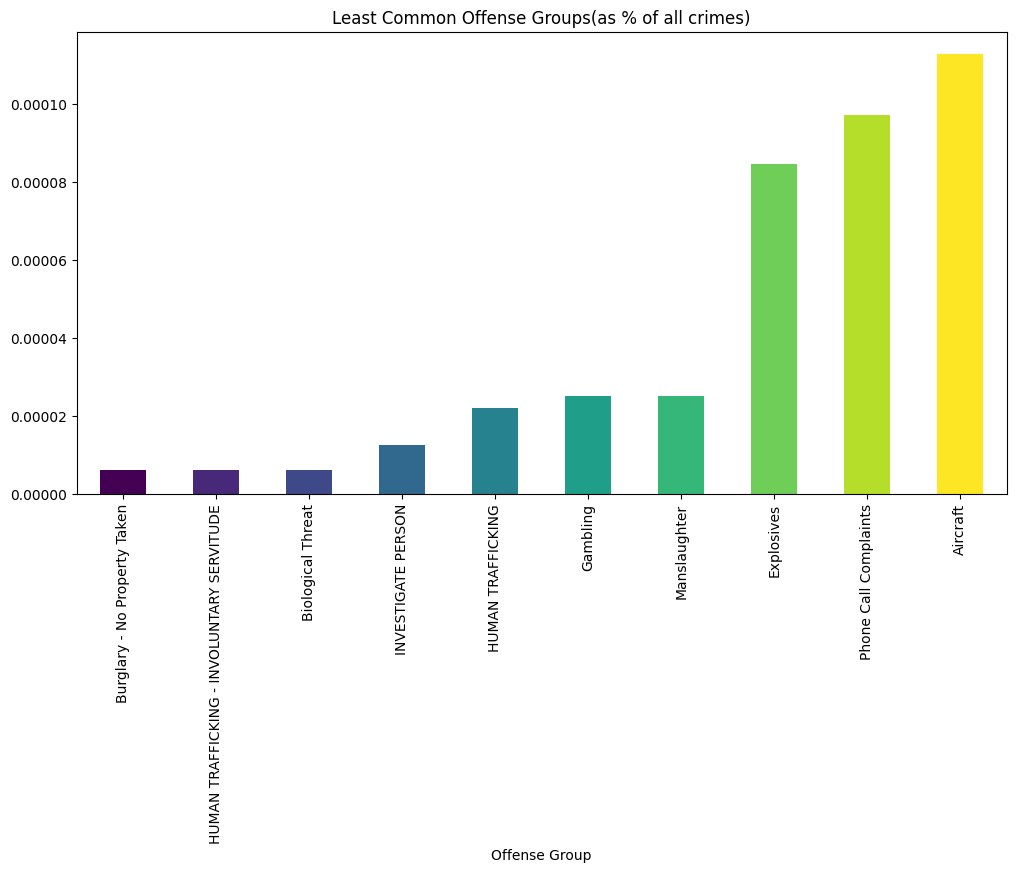

In [26]:
dt = crime.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=True)[:10]

plt.figure(figsize=(12,6))

# generates a different number corresponding to a unique color from the color group to use
colors = plt.cm.viridis(np.linspace(0, 1, len(dt)))


display('Least Common Offense Groups(as % of all crimes)')
display(dt/crime.shape[0])
(dt/crime.shape[0]).plot(kind='bar', color=colors)
plt.title('Least Common Offense Groups(as % of all crimes)')
plt.xlabel('Offense Group')

### What are the most common offense descriptions?

In [27]:
crime.OFFENSE_DESCRIPTION.value_counts()

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON                  18783
INVESTIGATE PERSON                             18753
M/V - LEAVING SCENE - PROPERTY DAMAGE          16323
VANDALISM                                      15153
ASSAULT SIMPLE - BATTERY                       14791
                                               ...  
KILLING OF FELON BY POLICE                         1
AUTO THEFT - OUTSIDE - RECOVERED IN BOSTON         1
DRUGS - GLUE INHALATION                            1
ROBBERY - KNIFE - STREET                           1
DRUGS - POSS CLASS D - INTENT MFR DIST DISP        1
Name: count, Length: 244, dtype: int64

In [28]:
crime.OFFENSE_DESCRIPTION.value_counts()[:10]

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON            18783
INVESTIGATE PERSON                       18753
M/V - LEAVING SCENE - PROPERTY DAMAGE    16323
VANDALISM                                15153
ASSAULT SIMPLE - BATTERY                 14791
VERBAL DISPUTE                           13099
TOWED MOTOR VEHICLE                      11287
INVESTIGATE PROPERTY                     11124
LARCENY THEFT FROM BUILDING               9069
THREATS TO DO BODILY HARM                 9042
Name: count, dtype: int64

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON            18783
INVESTIGATE PERSON                       18753
M/V - LEAVING SCENE - PROPERTY DAMAGE    16323
VANDALISM                                15153
ASSAULT SIMPLE - BATTERY                 14791
VERBAL DISPUTE                           13099
TOWED MOTOR VEHICLE                      11287
INVESTIGATE PROPERTY                     11124
LARCENY THEFT FROM BUILDING               9069
THREATS TO DO BODILY HARM                 9042
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

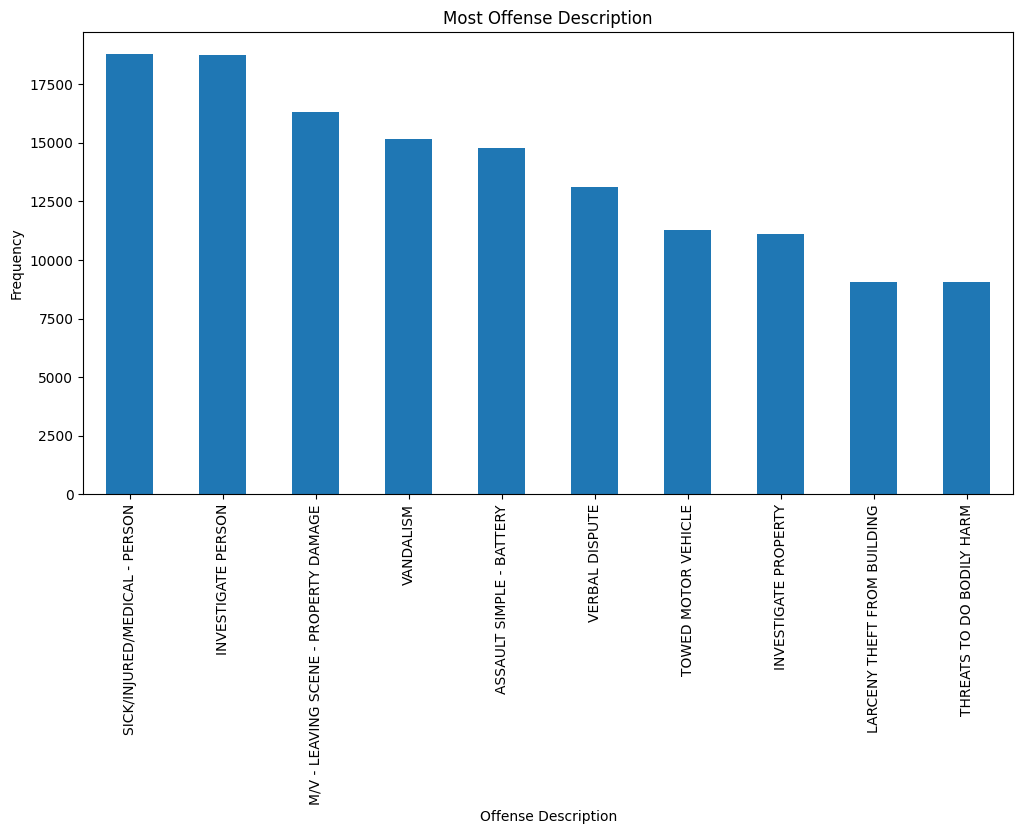

In [29]:
dt = crime.OFFENSE_DESCRIPTION.value_counts()[:10]

plt.figure(figsize=(12,6))

display(dt)

dt.plot(kind='bar')
plt.title('Most Offense Description')
plt.xlabel('Offense Description')
plt.ylabel('Frequency')

### Number of crimes per year

In [30]:
crime.groupby('YEAR').count()['INCIDENT_NUMBER']

YEAR
2015     53371
2016     99110
2017    100884
2018     65685
Name: INCIDENT_NUMBER, dtype: int64

### In which year most crimes were committed?

YEAR
2015     53371
2016     99110
2017    100884
2018     65685
Name: INCIDENT_NUMBER, dtype: int64

Text(0.5, 0, 'Years')

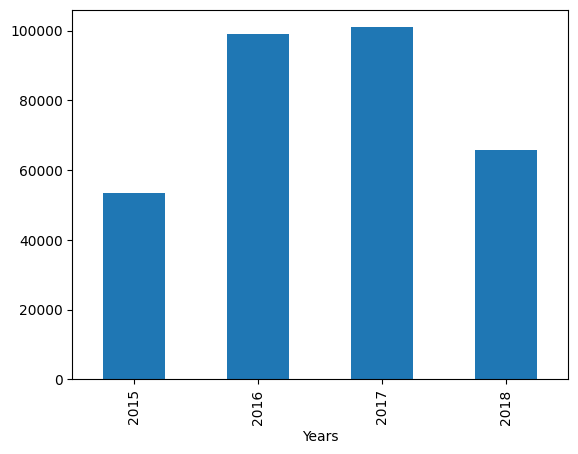

In [31]:
dt = crime.groupby('YEAR').count()['INCIDENT_NUMBER']

display(dt)

# plt.figure(figsize=(12,6))
dt.plot(kind='bar')
plt.xlabel('Years')

### Are there more crimes committed on specific dates?

DAY_OF_WEEK
Friday       48489
Wednesday    46727
Thursday     46655
Tuesday      46376
Monday       45674
Saturday     44816
Sunday       40313
Name: INCIDENT_NUMBER, dtype: int64

Text(0.5, 1.0, 'Day of the week')

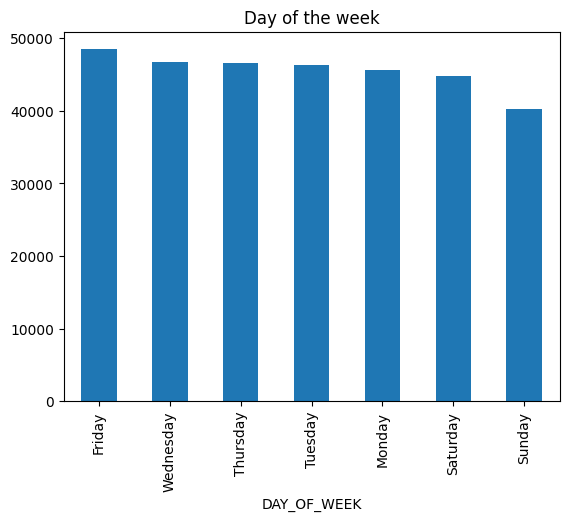

In [32]:
dt = crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending=False)

display(dt)

dt.plot(kind='bar')
plt.title('Day of the week')

### Are there more crimes happening at specific hours?

HOUR
0     15106
1      9267
2      7693
3      4589
4      3408
5      3311
6      5026
7      8850
8     13042
9     14740
10    16345
11    16445
12    18676
13    16845
14    17189
15    16519
16    19870
17    20762
18    20301
19    17587
20    15849
21    14109
22    12925
23    10596
Name: INCIDENT_NUMBER, dtype: int64

Text(0.5, 1.0, 'Hour wise crime rate')

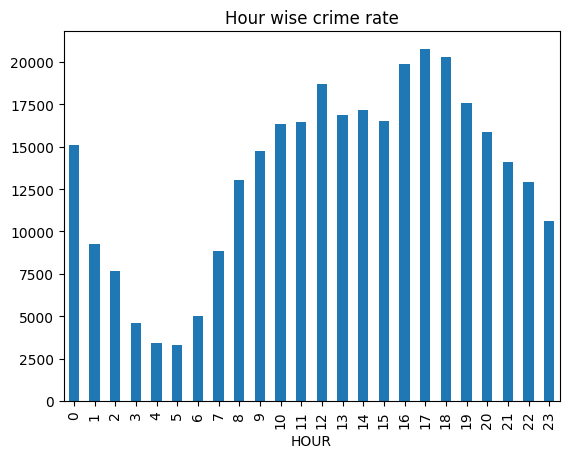

In [33]:
dt = crime.groupby('HOUR').count()['INCIDENT_NUMBER']

display(dt)

dt.plot(kind='bar')
plt.title('Hour wise crime rate')

### On what days at which hours most crimes are committed

In [36]:
crime.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()

DAY_OF_WEEK,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
HOUR,,,,,,,
0,2161,2000,2612,2400,2039,1897,1997
1,1275,1058,1855,2043,1077,1017,942
2,952,846,1827,1855,774,641,798
3,532,583,957,1119,526,460,412
4,441,386,672,704,436,399,370
5,485,417,478,517,508,462,444
6,768,709,530,543,866,787,823
7,1398,1352,1078,758,1405,1418,1441
8,2041,2046,1515,1123,2037,2145,2135


In [37]:
week_and_hour = crime.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()

In [38]:
week_and_hour.columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# to reorganize the columns in the format of monday, tuesday,............,sunday

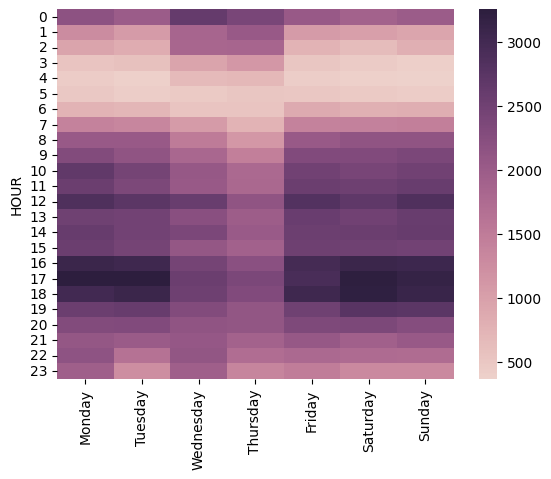

In [46]:
ax = sns.heatmap(week_and_hour,cmap=sns.cubehelix_palette(as_cmap=True))


### Months which had below average crime rate

In [65]:
avg_crime = crime.groupby(['YEAR','MONTH']).count()['INCIDENT_NUMBER'].mean()
print('The average crime is ' + str(avg_crime))

year_and_month = crime.groupby(['MONTH','YEAR']).count()['INCIDENT_NUMBER'].unstack()

def style_negative(v,props=''):
    return props if v < avg_crime else None
s2 = year_and_month.style.map(style_negative, props='color:blue')\
.map(lambda v:'opacity:20%' if(v<0.3) and (v>-0.3) else None)

s2

# display(year_and_month)
# sns.heatmap(year_and_month,cmap=sns.cubehelix_palette(as_cmap=True))

The average crime is 7976.25


YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


In [66]:
def highlight_max(s,props=''):
    return np.where(s == np.nanmax(s.values),props,'')

s2.apply(highlight_max,props='color:white;background-color:darkgreen',axis=0)

YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


### Months with below than average crime rate is blue and months with highest crime rate taht year are highlighted in green

In [72]:
print('The average crime is ' + str(avg_crime))
s2

The average crime is 7976.25


YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


### In which districts were the most crimes committed on yearly bases

In [77]:
dist_and_year = crime.groupby(['DISTRICT','YEAR']).count()['INCIDENT_NUMBER'].unstack()

<Axes: xlabel='YEAR', ylabel='DISTRICT'>

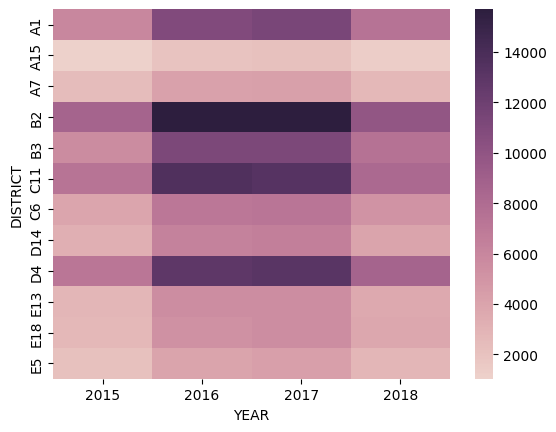

In [78]:
sns.heatmap(dist_and_year, cmap = sns.cubehelix_palette(as_cmap=True))

In [83]:
dist_avg_crime = crime.groupby(['DISTRICT','YEAR']).count()['INCIDENT_NUMBER'].mean()
print('The average crime is ' + str(dist_avg_crime))


def style_negative(v,props=''):
    return props if v < dist_avg_crime else None
s3 = dist_and_year.style.map(style_negative, props='color:blue')\
.map(lambda v:'opacity:20%' if(v<0.3) and (v>-0.3) else None)

def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s3.apply(highlight_max, props='color:white;background-color:darkgreen', axis=0)


The average crime is 6610.104166666667


YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6010,10922,11374,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8682,15706,15680,9872
B3,5616,11145,11195,7485
C11,7363,13602,13281,8282
C6,3939,7072,7247,5199
D14,3280,6279,6509,4059
D4,7203,12953,13157,8601
